In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [60]:
pd.set_option('display.max_columns', 100)

In [61]:
bank_rawdf = pd.read_csv(r"C:\DoPython\venv39\Personal_Project\Data_Portfolio\Loan Default Prediction\train.csv")
bank_rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [62]:
bank_rawdf

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


# Checking for null values

In [63]:
bank_rawdf.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [64]:
bank_rawdf.value_counts('Loan Status') # 1 - Deafaulters, 0 - Non-defaulters

Loan Status
0    61222
1     6241
dtype: int64

# Label enconding

In [65]:
for col in bank_rawdf.columns:
    if bank_rawdf[col].dtype == 'object': 
        print(col, ': ', len(bank_rawdf[col].unique()), 'labels')

Batch Enrolled :  41 labels
Grade :  7 labels
Sub Grade :  35 labels
Employment Duration :  3 labels
Verification Status :  3 labels
Payment Plan :  1 labels
Loan Title :  109 labels
Initial List Status :  2 labels
Application Type :  2 labels


In [66]:
exculde_objectdf = bank_rawdf.select_dtypes(exclude=['object'])
exculde_objectdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Interest Rate                 67463 non-null  float64
 6   Home Ownership                67463 non-null  float64
 7   Debit to Income               67463 non-null  float64
 8   Delinquency - two years       67463 non-null  int64  
 9   Inquires - six months         67463 non-null  int64  
 10  Open Account                  67463 non-null  int64  
 11  Public Record                 67463 non-null  int64  
 12  Revolving Balance             67463 non-null  int64  
 13  R

In [67]:
inculde_objectdf = bank_rawdf.select_dtypes(include=['object'])
inculde_objectdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Batch Enrolled       67463 non-null  object
 1   Grade                67463 non-null  object
 2   Sub Grade            67463 non-null  object
 3   Employment Duration  67463 non-null  object
 4   Verification Status  67463 non-null  object
 5   Payment Plan         67463 non-null  object
 6   Loan Title           67463 non-null  object
 7   Initial List Status  67463 non-null  object
 8   Application Type     67463 non-null  object
dtypes: object(9)
memory usage: 4.6+ MB


In [68]:
from sklearn.preprocessing import LabelEncoder
labeldf_encode = inculde_objectdf.apply(LabelEncoder().fit_transform)
labeldf_encode

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,16,1,13,0,0,0,42,1,0
1,4,2,17,2,1,0,49,0,0
2,11,5,18,0,1,0,42,1,0
3,15,2,12,0,1,0,49,1,0
4,32,2,18,0,1,0,38,1,0
...,...,...,...,...,...,...,...,...,...
67458,21,2,3,0,2,0,38,1,0
67459,7,2,7,2,1,0,38,1,0
67460,5,0,27,0,2,0,64,1,0
67461,14,3,22,1,0,0,49,0,0


In [69]:
bank_finaldf = exculde_objectdf.join(labeldf_encode)
bank_finaldf

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,65087372,10000,32236,12329.36286,59,11.135007,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0,16,1,13,0,0,0,42,1,0
1,1450153,3609,11940,12191.99692,59,12.237563,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0,4,2,17,2,1,0,49,0,0
2,1969101,28276,9311,21603.22455,59,12.545884,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0,11,5,18,0,1,0,42,1,0
3,6651430,11170,6954,17877.15585,59,16.731201,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0,15,2,12,0,1,0,49,1,0
4,14354669,16890,13226,13539.92667,59,15.008300,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0,32,2,18,0,1,0,38,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,9.408858,83961.15003,28.105127,1,0,13,0,4112,97.779389,19,1978.945960,0.023478,564.614852,0.865230,0,69,0,48,181775,34301,1,21,2,3,0,2,0,38,1,0
67459,35182714,8323,11046,15637.46301,59,9.972104,65491.12817,17.694279,0,0,12,0,9737,15.690703,14,3100.803125,0.027095,2.015494,1.403368,0,14,0,37,22692,8714,0,7,2,7,2,1,0,38,1,0
67460,16435904,15897,32921,12329.45775,59,19.650943,34813.96985,10.295774,0,0,7,1,2195,1.500090,9,2691.995532,0.028212,5.673092,1.607093,0,137,0,17,176857,42330,0,5,0,27,0,2,0,64,1,0
67461,5300325,16567,4975,21353.68465,59,13.169095,96938.83564,7.614624,0,0,14,0,1172,68.481882,15,3659.334202,0.074508,1.157454,0.207608,0,73,0,61,361339,39075,0,14,3,22,1,0,0,49,0,0


# Exploratory Data Analysis

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

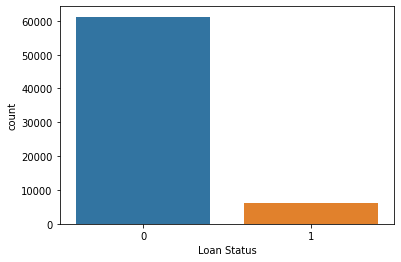

In [70]:
sns.countplot(bank_finaldf['Loan Status']) # 0 is Non-defaulters and 1 is defaulters

<AxesSubplot:>

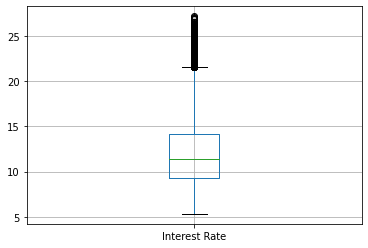

In [71]:
bank_finaldf[['Interest Rate']].boxplot()

<AxesSubplot:>

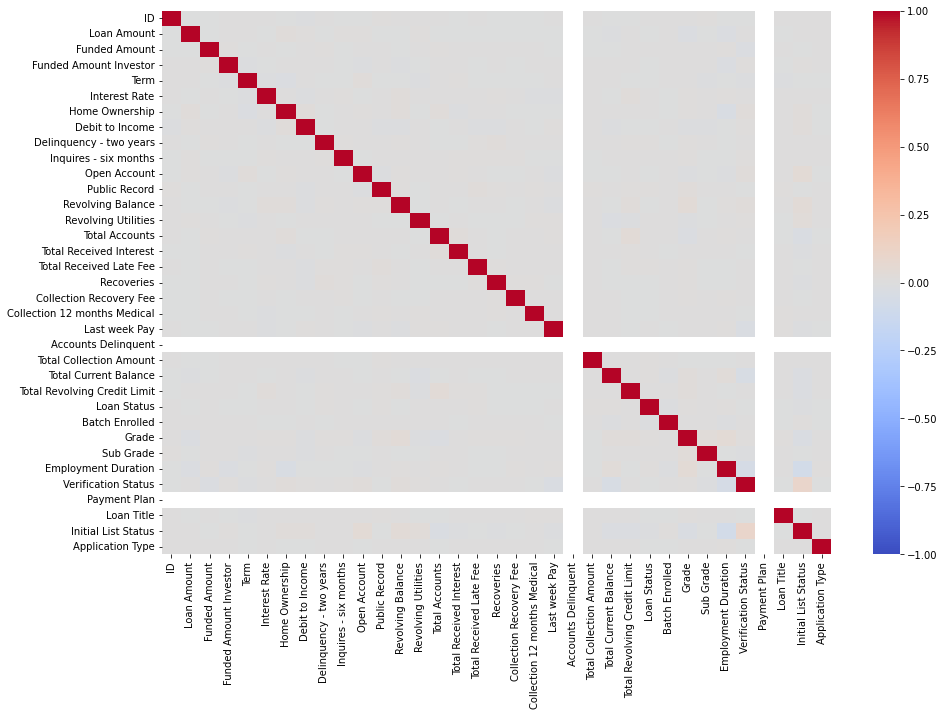

In [72]:
plt.figure(figsize=(15, 10))
sns.heatmap(bank_finaldf.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# Checking for Outliers with box plot and PCA technique

In [73]:
def detect_outliers(col):
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers

In [74]:
# Apply the outlier detection function to each column of the dataframe
outliers = bank_finaldf.apply(detect_outliers)

In [75]:
# Calculate the percentage of outliers in each column
percent_outliers = (outliers.count() / bank_finaldf.count()) * 100
print(percent_outliers)

ID                               0.000000
Loan Amount                      0.000000
Funded Amount                    0.000000
Funded Amount Investor           4.599558
Term                             2.159702
Interest Rate                    1.261432
Home Ownership                   6.099640
Debit to Income                  0.000000
Delinquency - two years         22.840668
Inquires - six months           10.341965
Open Account                     8.321599
Public Record                    6.806694
Revolving Balance                5.512651
Revolving Utilities              0.000000
Total Accounts                   2.110787
Total Received Interest          7.378860
Total Received Late Fee          5.001260
Recoveries                       3.412241
Collection Recovery Fee          1.199176
Collection 12 months Medical     2.130056
Last week Pay                    0.000000
Accounts Delinquent              0.000000
Total Collection Amount          7.100188
Total Current Balance            2

In [76]:
# Checking the highest column with outliers
bank_finaldf['Delinquency - two years'].value_counts()

0    52054
1    11736
2     2651
3      445
7      252
6      191
5       74
8       44
4       16
Name: Delinquency - two years, dtype: int64

# Predictive Analysis

In [82]:
bank = bank_finaldf.drop(['Loan Status'], axis=1)
Target_class = bank_finaldf['Loan Status']

In [83]:
Target_class

0        0
1        0
2        0
3        0
4        0
        ..
67458    1
67459    0
67460    0
67461    0
67462    0
Name: Loan Status, Length: 67463, dtype: int64

In [84]:
column_names = list(bank.columns.values)

In [85]:
# Scalling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bank_scaled = pd.DataFrame(scaler.fit_transform(bank), columns=column_names)
bank_scaled

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
0,1.870894,-0.818483,2.020064,-0.337854,0.248297,-0.191268,2.127642,-0.829943,0.840164,-0.307961,-0.203463,-0.234958,2.111596,0.977986,-1.397725,0.387350,-0.198674,-0.160195,-0.094966,-0.147527,-0.511670,0.0,-0.155120,1.091309,-0.789041,-0.253456,-0.589775,0.140040,-0.881212,-1.436657,0.0,-0.295455,0.926572,-0.042738
1,-1.146318,-1.582243,-0.469958,-0.358098,0.248297,0.105229,-0.904035,-0.933158,-0.408459,-0.307961,-0.364105,-0.234958,-0.878926,1.127265,-0.676500,-0.583384,-0.211235,-0.160534,-0.043073,-0.147527,0.873515,0.0,-0.125565,0.165689,-0.106997,-1.311013,0.133380,0.680215,1.270328,-0.035900,0.0,0.336862,-1.079247,-0.042738
2,-1.121714,1.365603,-0.792498,1.028905,0.248297,0.188142,0.243515,0.572470,-0.408459,-0.307961,-0.042821,-0.234958,-0.747355,-2.254570,0.164928,-0.542629,3.362623,-0.155103,-0.030106,-0.147527,-0.119201,0.0,-0.151090,-0.501847,0.144957,-0.694105,2.302844,0.815258,-0.881212,-0.035900,0.0,-0.295455,0.926572,-0.042738
3,-0.899712,-0.678661,-1.081668,0.479766,0.248297,1.313651,0.616163,-0.621824,0.840164,-0.307961,-1.167316,-0.234958,0.780958,0.646804,-0.796704,-0.801484,-0.209719,-0.166892,-0.107503,-0.147527,-0.742534,0.0,-0.143030,-1.081655,1.773285,-0.341586,0.133380,0.004996,-0.881212,-0.035900,0.0,0.336862,0.926572,-0.042738
4,-0.534480,0.004911,-0.312185,-0.159444,0.248297,0.850331,-0.806299,-0.720484,0.840164,6.030678,-0.203463,2.650186,-0.785512,1.435774,0.405337,-0.873015,3.463301,3.459510,-0.216682,-0.147527,-1.227349,0.0,0.380899,-0.241275,-0.026008,1.156619,0.133380,0.815258,-0.881212,-0.035900,0.0,-0.656779,0.926572,-0.042738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,-0.448650,-0.388143,-1.094672,-0.213184,0.248297,-0.655461,0.075944,0.568625,0.840164,-0.307961,-0.203463,-0.234958,-0.457797,1.991631,0.044724,-0.040527,-0.213658,1.414257,-0.074476,-0.147527,-0.049942,0.0,-0.132282,0.159683,0.534409,0.187192,0.133380,-1.210396,-0.881212,1.364858,0.0,-0.656779,0.926572,-0.042738
67459,0.453033,-1.018894,-0.579639,0.149686,0.248297,-0.503994,-0.334239,-0.663171,-0.408459,-0.307961,-0.364105,-0.234958,0.260035,-1.650396,-0.556296,0.464382,-0.212968,-0.161547,0.079725,-0.147527,-1.319695,0.0,-0.147060,-0.984534,-0.688881,-1.046624,0.133380,-0.670222,1.270328,-0.035900,0.0,-0.656779,0.926572,-0.042738
67460,-0.435803,-0.113758,2.104103,-0.337840,0.248297,2.098823,-1.015518,-1.538551,-0.408459,-0.307961,-1.167316,2.650186,-0.702435,-2.279991,-1.157316,0.280392,-0.212755,-0.151302,0.138101,-0.147527,1.519934,0.0,-0.173928,0.124310,0.918268,-1.222883,-1.312930,2.030651,-0.881212,1.364858,0.0,1.691828,0.926572,-0.042738
67461,-0.963771,-0.033689,-1.324462,0.992129,0.248297,0.355735,0.364152,-1.855781,-0.408459,-0.307961,-0.042821,-0.234958,-0.832985,0.691790,-0.436092,0.715757,-0.203927,-0.163950,-0.262914,-0.147527,0.042404,0.0,-0.114818,1.451211,0.762650,-0.429716,0.856535,1.355433,0.194558,-1.436657,0.0,0.336862,-1.079247,-0.042738


In [86]:
X = bank.drop(['ID'], axis = 1)
y = Target_class

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53970, 33) (13493, 33) (53970,) (13493,)


In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model_xgb_base = XGBClassifier()

In [96]:
model_xgb_base.fit(X_test, y_test)

[20:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
y_pred = model_xgb_base.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_pred = model_xgb_base.predict(X_test)
print('Testing results:\n' + 'Accuracy:', metrics.accuracy_score(y_test, y_pred))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[1, 0]),
                  index=['actual 1', 'actual 0'],
                  columns=['predicted 1', 'predicted 0'])
print('Confusion matrix:\n', cm)

TP = cm.at['actual 1', 'predicted 1']
FP = cm.at['actual 0', 'predicted 1']
FN = cm.at['actual 1', 'predicted 0']
print('precision =', TP/(TP+FP), ', recall =', TP/(TP+FN), ', F1-score =', 2*TP/(2*TP+FP+FN))

Testing results:
Accuracy: 0.9697620988660787
Confusion matrix:
           predicted 1  predicted 0
actual 1          840          408
actual 0            0        12245
precision = 1.0 , recall = 0.6730769230769231 , F1-score = 0.8045977011494253


# Feature Importance

<Figure size 1080x1080 with 0 Axes>

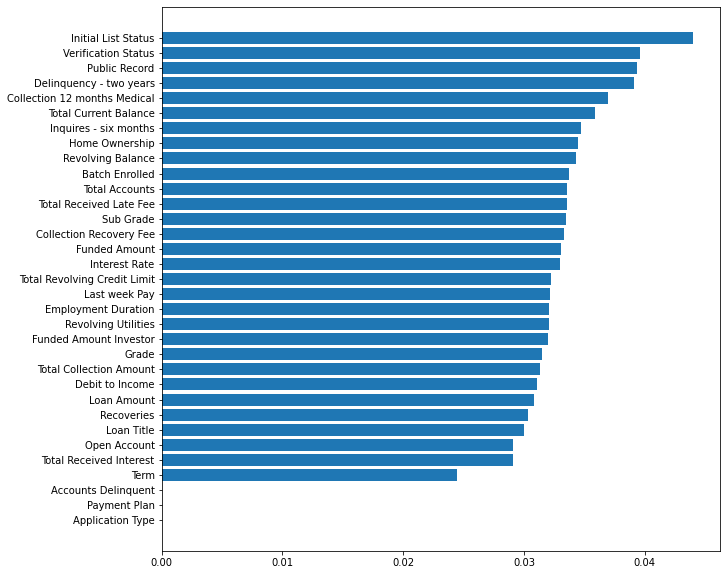

<Figure size 1080x1080 with 0 Axes>

In [107]:
sorted_index = model_xgb_base.feature_importances_.argsort()
plt.barh(X.columns[sorted_index],model_xgb_base.feature_importances_[sorted_index])
plt.figure(figsize=(15, 15))